## Project Description:
The goal of this project is to identify patterns in video game sales data to understand the factors that drive a game's success. With this information, it will be possible to predict which games are likely to succeed in the future and plan more targeted advertising campaigns. The 2016 data will be used to make forecasts for 2017, focusing on understanding which game attributes, such as genre, reviews, and other factors, directly impact sales. This will help in making data-driven decisions and optimizing marketing strategies.

## Index
1. Data Description
2. Relevant results
3. Import libraries and read file
4. Pre-processing data 
5. Data Analysis


## 1. Data Description:
The dataset provides open-access information on user and critic ratings, game genres, platforms (e.g., Xbox, PlayStation), and historical sales data, starting from 2016. A key feature of the dataset is the "rating" column, which stores the ESRB (Entertainment Software Rating Board) classification for each game. The ESRB evaluates the content of each game and assigns an age rating, such as "Teen" or "Mature," to indicate the appropriate audience based on the game's content. This data will be instrumental in analyzing and identifying factors that influence the success of a game.

Content of the *games.csv* file: 
- **Name**: Game title
- **Platform**: Game platform (e.g., Xbox, PlayStation)
- **Year_of_Release**: Release year
- **Genre**: Game genre
- **NA_sales**: North American sales (in millions USD)
- **EU_sales**: European sales (in millions USD)
- **JP_sales**: Japanese sales (in millions USD)
- **Other_sales**: Sales in other countries (in millions USD)
- **Critic_Score**: Critic score (max 100)
- **User_Score**: User score (max 10)
- **Rating**: ESRB rating (e.g., Teen, Mature)

## 2. Relevant results
- **Key Time Periods**:  
  - Significant increase in the number of games released begins in **2002**.
  - **2005** marks the start of a relevant period for modeling data toward **2017**, with platforms still active in 2015 emerging during this time.

- **Platform Popularity**:  
  - In **2002**, top 5 platforms: **PS2**, **X360**, **Wii**, **PS3**, and **DS**.
  - By **2005**, platforms still relevant in **2015** are emerging, and the order of popularity shifts: **X360**, **Wii**, **PS3**, **DS**, and **PS2**.
    - Meaning PS2's popularity peaks earlier.

- **Projected Relevance for 2017**:  
  - Game lifetime data suggests a **10-year lifecycle**.
  - Based on that, analysis of top 10 best-selling games suggests **PS4** will remain relevant in **2017**.

- **Correlation Analysis**:  
  - Positive correlation observed between **critic scores** and **total sales** for **Wii**, **PS2**, and **PS4**, indicating that higher critic scores positively influence total sales.  
  - A weaker positive correlation observed between **user ratings** and **total sales** for **Wii**, **PS2**, with an almost null correlation for PS4.

- **Platform Genre Investment and Sales**:  
  - Platforms focusing on **action**, **sports**, and **shooter** genres tend to have higher **total sales** compared to others.

## 3. Import libraries and read file

In [317]:
# Import libraries
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the pearsonr function, which calculates the Pearson correlation coefficient between two variables
from scipy.stats import pearsonr

# To suppress unnecessary information in outputs
import warnings
warnings.filterwarnings('ignore')

# Pallete
plt.style.use('seaborn-v0_8-deep')

In [318]:
# Read and display file
df_sales = pd.read_csv('datasets\games.csv')
df_sales.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## 4. Pre-processing data
The column names will be standardized for consistency, and the data will be converted to appropriate types.

 Numeric columns, such as sales and scores, will be converted to float or integer, while categorical columns will remain as strings. Missing sales data will be filled with 0, while missing ratings will be left as nan. Any "tbd" values will be treated as missing data. Additionally, the total sales for each game will be calculated by summing sales across all regions and added as a new column to provide a complete view of each game's performance.

In [319]:
# Standardizing columns 
df_sales.columns = df_sales.columns.str.lower()

# displaying DataFrame
df_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [320]:
# Displaying DataFrame informations
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### *'year_of_release'* column:

In [321]:
# Displaying unique values in 'year_of_release' column
unique_years_of_release = df_sales['year_of_release'].unique()
unique_years_of_release

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [322]:
# Deep understanding the nan values in the 'year_of_release' column

# Filtering only rows with nan values in that column and displaying results
year_nan = df_sales[df_sales['year_of_release'].isnull()]
year_nan.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
10050,Star Trek: Conquest,PS2,NaN,Strategy,0.06,0.04,0.00,0.01,54.0,9.1,E
4818,LEGO Harry Potter: Years 5-7,3DS,NaN,Action,0.18,0.19,0.00,0.03,71.0,6.5,E10+
9516,Nintendo Puzzle Collection,GC,NaN,Puzzle,0.00,0.00,0.13,0.00,NaN,NaN,NaN
7406,DanceDanceRevolution II,Wii,NaN,Misc,0.20,0.00,0.00,0.01,NaN,tbd,E10+


In [323]:
# Sum of the null 'year_of_release' values
null_sum_year = df_sales['year_of_release'].isnull().sum()
null_sum_year

269

In [324]:
# Dealing with nan values in the 'year_of_release' column

# Replacing nan values for the first 'year_of_release' value from each game_name
df_sales['year_of_release'] = df_sales['year_of_release'].fillna(df_sales.groupby('name')['year_of_release'].transform('first'))

In [325]:
# Sum of the null 'year_of_release' values
null_sum_year = df_sales['year_of_release'].isnull().sum()
null_sum_year

146

In [326]:
# Replacing nan values for the first 'year_of_release' value from each platform
df_sales['year_of_release'] = df_sales['year_of_release'].fillna(df_sales.groupby('platform')['year_of_release'].transform('first'))

In [327]:
# Sum of the null 'year_of_release' values
null_sum_year = df_sales['year_of_release'].isnull().sum()
null_sum_year

0

In [328]:
# Converting data type of 'year_of_release' column to integer for better future analyses
df_sales['year_of_release'] = df_sales['year_of_release'].astype(int)
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


In [329]:
# Finding the proportion of null values for each column
null_prop = df_sales.isnull().mean() * 100
null_prop

name                0.011965
platform            0.000000
year_of_release     0.000000
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

#### *'name'* column:

In [330]:
# Sum of the null 'name' values
null_sum_name = df_sales['name'].isnull().sum()
null_sum_name

2

In [331]:
# Dealing with nan values in the 'name' column

# Dropping NaN values as they represent a small proportion
df_sales = df_sales.dropna(subset=['name'])
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.5+ MB


In [332]:
# Sum of the null 'name' values
null_sum_name = df_sales['name'].isnull().sum()
null_sum_name

0

#### *'rating'* column:

In [333]:
# Displaying unique values of rating column
unique_rating = df_sales['rating'].unique()
unique_rating

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Rating description:
* Adults Only (AO)
* Mature (M)
* Early Childhood (EC)
* Everyone 10+ (E10+)
* Teen(T)
* Kids to Adults (K-A) 
* Everyone (E)
* Rating Pending (RP) = nan values

In [334]:
df_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [335]:
# Dealing with nan values in the 'rating' column

# Replacing nan values with 'RP'
df_sales['rating'] = df_sales['rating'].fillna('RP')

In [336]:
# Displaying sum of null values in 'rating'
df_sales['rating'].isnull().sum()

0

In [337]:
# Displaying informations about the DataFrame
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.5+ MB


#### Total sales calculation (creating a new column)

In [338]:
# Creating the total_sales column
df_sales['total_sales'] = df_sales['na_sales'] + df_sales['eu_sales'] + df_sales['jp_sales']

# Displaying results
df_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,30.38


#### 'critic_score' column

In [339]:
# Cheking data from critic_score
print("Column critic_score", df_sales['critic_score'].unique())

Column critic_score [76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]


#### 'user_score' column

In [340]:
# Cheking data from user_score
print("Column User_score: ",df_sales['user_score'].unique())

Column User_score:  ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [341]:
# Removing tbd score
df_sales_cleaned_scores = df_sales[~(df_sales['user_score'] == 'tbd')]

In [342]:
# Converting type 
df_sales_cleaned_scores['user_score'] = df_sales_cleaned_scores['user_score'].astype(float)

# Displaying results
df_sales_cleaned_scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14289 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14289 non-null  object 
 1   platform         14289 non-null  object 
 2   year_of_release  14289 non-null  int32  
 3   genre            14289 non-null  object 
 4   na_sales         14289 non-null  float64
 5   eu_sales         14289 non-null  float64
 6   jp_sales         14289 non-null  float64
 7   other_sales      14289 non-null  float64
 8   critic_score     7055 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           14289 non-null  object 
 11  total_sales      14289 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.4+ MB


## 5. Data Analyses 

The analysis will explore game releases across different years and assess if the data is significant. Sales trends will be examined by platform, focusing on the top performers and creating distributions by year. Platforms with declining sales will be identified, and the lifespan of platforms will be analyzed.

The relevant time period for analysis will be chosen based on the findings, and a model for 2017 will be built using only relevant data.

Sales leaders will be identified, and a box plot will be used to compare global sales across platforms. The correlation between user/critic reviews and sales will be analyzed for a selected platform.

Finally, game genres will be assessed to identify the most profitable ones and determine patterns in sales.

In [343]:
# Selecting the amount of games per year and sort by year
num_games_year = df_sales['year_of_release'].value_counts().sort_values().sort_index()

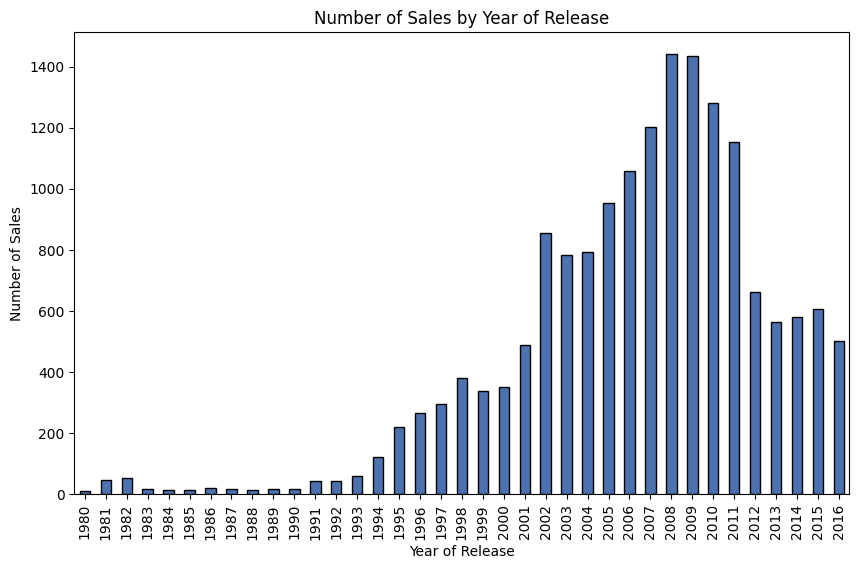

In [344]:
# Plotting data visualization
plt.figure(figsize=(10,6))
num_games_year.plot(kind='bar', edgecolor='black')

# Adding title and labels
plt.title('Number of Sales by Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Number of Sales')

# Display the chart
plt.show()

**It can be observed that sales began to increase in 1994, and from 2002, there was a significant rise in the number of games released. Therefore, the period selected for further analysis starts from 2002, as it is likely to be more relevant for analyzing recent data**

In [345]:
# Selecting total sales from each platform 
df_total_sales_plat = df_sales.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index(drop=False)

# Selecting the top platforms with the highest total sales
top_total_sales_plat = df_total_sales_plat.head(10)
top_total_sales_plat

,platform,total_sales
0,PS2,1062.33
1,X360,885.66
2,Wii,828.44
3,PS3,803.97
4,DS,746.86
5,PS,689.95
6,GBA,310.12
7,PS4,265.79
8,PSP,252.63
9,XB,249.02


In [346]:
# Listing the platform names
top_total_sales_plat_list = top_total_sales_plat['platform'].to_list()

# Displaying results
print("The most popular platforms are:", top_total_sales_plat_list)

The most popular platforms are: ['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'XB']


In [347]:
# Filtering the period data
df_sales_new_period = df_sales[df_sales['year_of_release'] >= 2002]

# Checking result
df_sales_new_period['year_of_release'].unique()

array([2006, 2008, 2009, 2005, 2007, 2010, 2013, 2004, 2002, 2011, 2015,
       2012, 2014, 2016, 2003])

In [348]:
# Selecting only the top 10 platforms in the DataFrame
df_sales_most_pop_plat = df_sales_new_period[df_sales_new_period['platform'].isin(top_total_sales_plat_list)]

# Checking results
unique_plat = df_sales_most_pop_plat['platform'].unique()
unique_plat

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', 'XB', 'PSP', 'PS'],
      dtype=object)

In [349]:
# Grouping the data by year and platform, and summing total sales
platform_sales = df_sales_most_pop_plat.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
# Cheking results 
platform_sales.head()

platform,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360,XB
year_of_release,,,,,,,,,,
2002,NaN,76.36,6.31,186.26,NaN,NaN,NaN,NaN,NaN,49.20
2003,NaN,55.31,1.93,171.14,NaN,NaN,NaN,NaN,NaN,53.14
2004,15.91,76.10,NaN,179.41,NaN,NaN,5.98,NaN,NaN,64.83
2005,119.34,33.94,NaN,141.51,0.15,NaN,37.89,NaN,8.51,47.36
2006,113.38,5.37,NaN,89.92,17.30,NaN,47.26,130.27,47.36,9.72


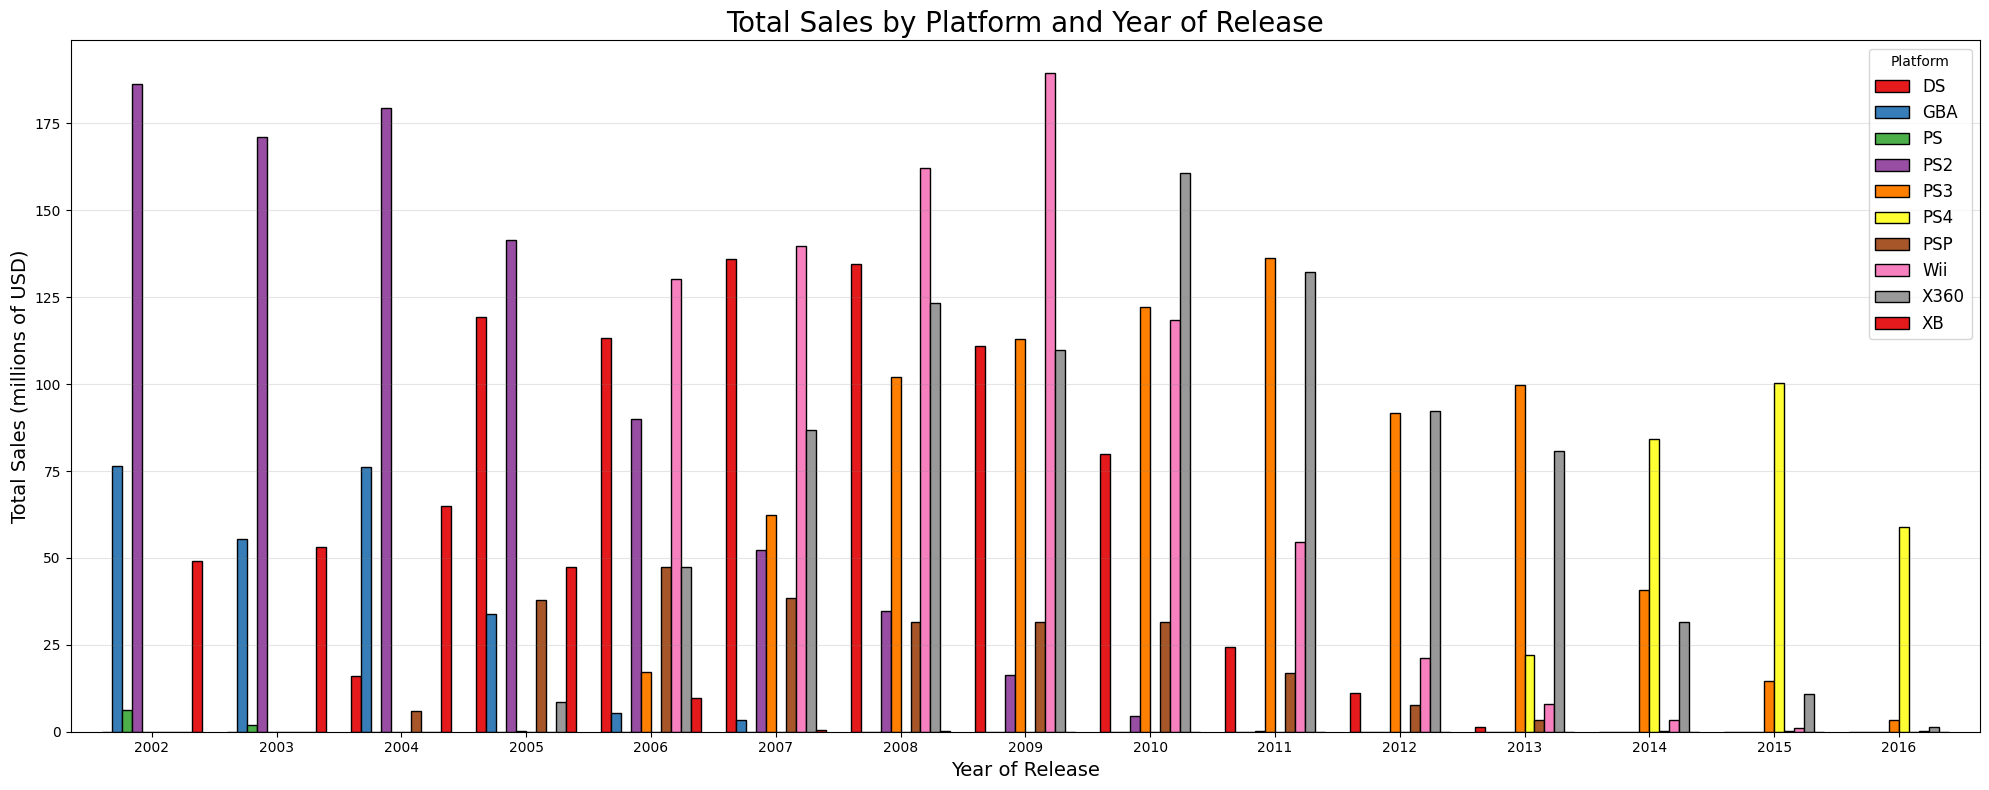

In [350]:
# Custumizing pallete
palette = sns.color_palette("Set1", len(unique_plat))

# Plotting the bar chart
platform_sales.plot(kind='bar', stacked=False, figsize=(20, 8), width=0.8, edgecolor='black', color=palette)

# Adding title and labels
plt.title('Total Sales by Platform and Year of Release', fontsize=20)
plt.xlabel('Year of Release', fontsize= 14)
plt.ylabel('Total Sales (millions of USD)', fontsize=14)

plt.grid(True, axis='y', color='grey', alpha=0.2)
plt.legend(loc='upper right', fontsize='large', title='Platform', frameon=True)
plt.xticks(rotation=0)
plt.tight_layout()

# Display the chart
plt.show()


**In the plot above, it is possible to noticed that the lifetime of a platforma is around 10 years. In addition, for making preditions for 2017 is interesting to futher limite the period time. This way, it will be select data from 2005 since it still has information from one platform that exists in 2016.**

#### Top total sales platform amalyses

* Quais plataformas estão liderando em vendas? Quais estão crescendo ou diminuindo? Selecione várias plataformas potencialmente lucrativas.

In [351]:
# Filtering data from 2005
df_sales_from_2005 = df_sales[df_sales['year_of_release'] >= 2005]

# Checking result
df_sales_from_2005['year_of_release'].unique()

array([2006, 2008, 2009, 2005, 2007, 2010, 2013, 2011, 2015, 2012, 2014,
       2016])

In [352]:
# Selecting top platforms by grouping platforms per total sales
plat_total_sales = df_sales_from_2005.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()

# Checking results
plat_total_sales.head()

,platform,total_sales
0,X360,885.66
1,Wii,828.44
2,PS3,803.49
3,DS,730.93
4,PS2,339.45


In [353]:
# Selecting the most popular platforms
top_plat_2005_list = plat_total_sales['platform'].unique()

print(type(top_total_sales_plat_list))
print(top_total_sales_plat_list)

<class 'list'>
['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'XB']


In [354]:
# Filtering new DataFrame with the top 5 platforms
df_top_from_2005 = df_sales_from_2005[df_sales_from_2005['platform'].isin(top_total_sales_plat_list)].reset_index(drop=True)

# Checking results
df_top_from_2005.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,74.09
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,29.82
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,26.92
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,26.07


In [355]:
# Grouping by platforms and year of release
df_total_sales_year_f_2005 = df_top_from_2005.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# checking results
df_total_sales_year_f_2005.head()

,platform,year_of_release,total_sales
0,DS,2005,119.34
1,DS,2006,113.38
2,DS,2007,136.12
3,DS,2008,134.42
4,DS,2009,111.01


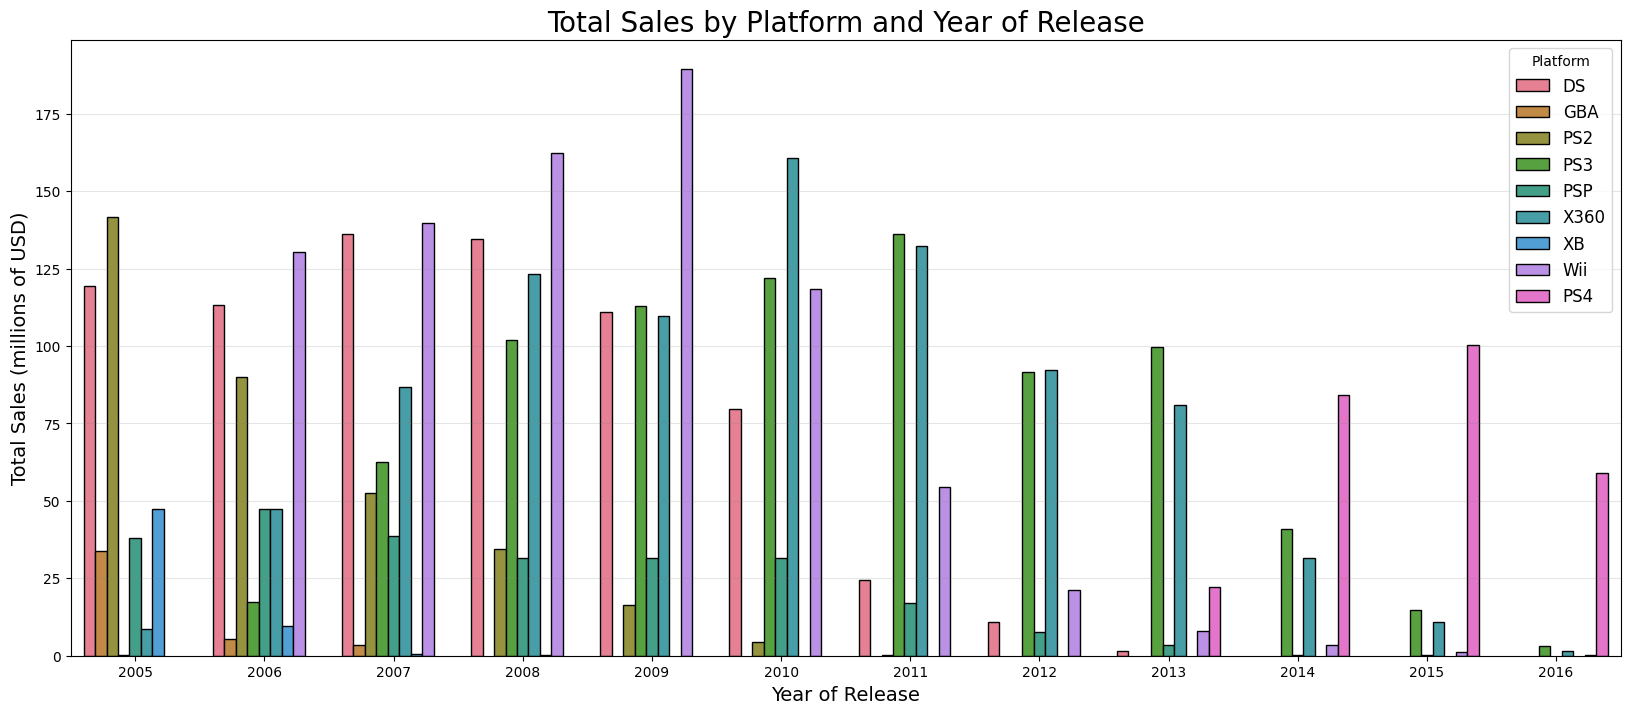

In [356]:
# Custumizing pallete
palette = sns.color_palette("Set1", len(top_total_sales_plat_list))

# Plotting data
plt.figure(figsize=(20, 8))
sns.barplot(x='year_of_release', y='total_sales', hue='platform', data=df_total_sales_year_f_2005, edgecolor='black')

# Adding title and labels
plt.title('Total Sales by Platform and Year of Release', fontsize=20)
plt.xlabel('Year of Release', fontsize=14)
plt.ylabel('Total Sales (millions of USD)', fontsize=14)

plt.grid(True, axis='y', color='grey', alpha=0.2)
plt.legend(loc='upper right', fontsize='large', title='Platform', frameon=True)
plt.xticks(rotation=0)

# Display the chart
plt.show()


**According to the plot above, platforms with the highest total sales values are not as relevant in the most recent years. However, the PS4 data suggests that this platform will remain relevant in 2017. Lastly, we can observe that platforms such as Wii, PS3, and X360 still appear in 2016, albeit with reduced relevance compared to earlier years.**

#### Sales distribution across all platforms

In [357]:
# Grouping total sales across the period by platforms
df_sales_plat_all_period = df_sales.groupby(['platform','year_of_release'])['total_sales'].sum().sort_values(ascending=False).reset_index(drop=False)

# Checking results
df_sales_plat_all_period.head()

,platform,year_of_release,total_sales
0,Wii,2009,189.43
1,PS2,2002,186.26
2,PS2,2004,179.41
3,PS2,2003,171.14
4,Wii,2008,162.17


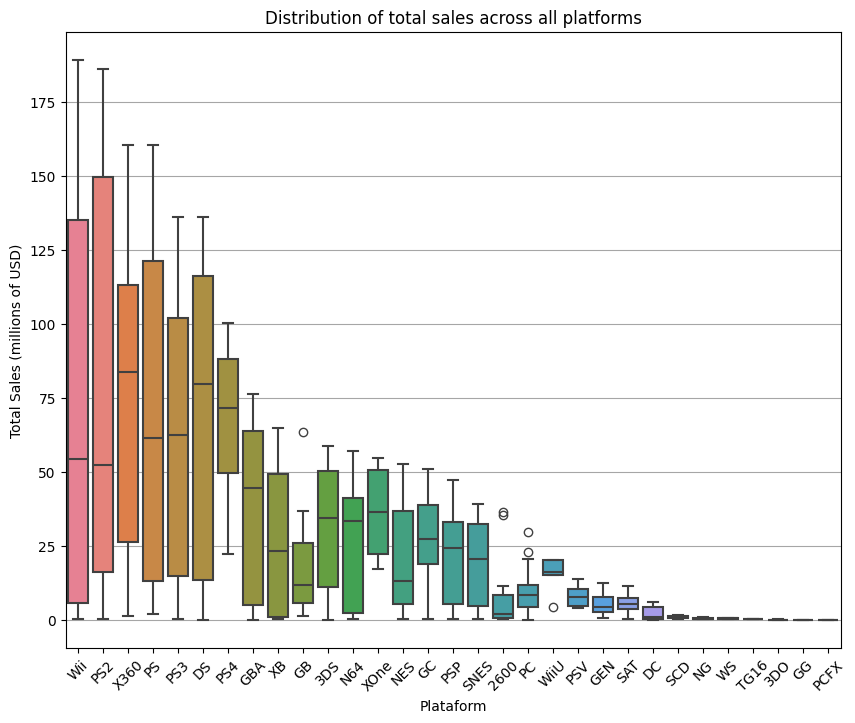

In [358]:
# Plotting vizualisation
plt.figure(figsize=(10, 8))
sns.boxplot(x='platform', y='total_sales', hue='platform', data=df_sales_plat_all_period,  width=0.8, linewidth=1.5)

# Custumizing vizualization
plt.title('Distribution of total sales across all platforms')
plt.xlabel('Plataform')
plt.ylabel('Total Sales (millions of USD)')

plt.grid(True, axis='y', color='grey', alpha=0.7)
plt.xticks(rotation=45)

plt.show()

**The first six platforms have sales between 0 and 125 million, with the sales averages of the four of them being quite similar. However, there is a significant gap between these platforms and the others. Additionally, the PS4 platform (7th place) shows notably higher sales compared to the rest. From 8th to 17th place, platforms have sales ranging from 0 to 50 million. After that, sales drop sharply, falling below 25 million in total global sales.**

#### Score analyses

In [359]:
# Selecting all information from Wii platform
df_wii = df_sales_cleaned_scores[df_sales_cleaned_scores['platform'] == "Wii"]

# Dropping nan values
df_wii= df_wii.dropna()

#checking results
df_wii.info()

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, 0 to 16308
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             492 non-null    object 
 1   platform         492 non-null    object 
 2   year_of_release  492 non-null    int32  
 3   genre            492 non-null    object 
 4   na_sales         492 non-null    float64
 5   eu_sales         492 non-null    float64
 6   jp_sales         492 non-null    float64
 7   other_sales      492 non-null    float64
 8   critic_score     492 non-null    float64
 9   user_score       492 non-null    float64
 10  rating           492 non-null    object 
 11  total_sales      492 non-null    float64
dtypes: float64(7), int32(1), object(4)
memory usage: 48.0+ KB


In [360]:
# Calculating the correlation coefficient for Wii platform
users_correlation, _ = pearsonr(df_wii['total_sales'], df_wii['user_score'])
critic_correlation, _ = pearsonr(df_wii['total_sales'], df_wii['critic_score'])

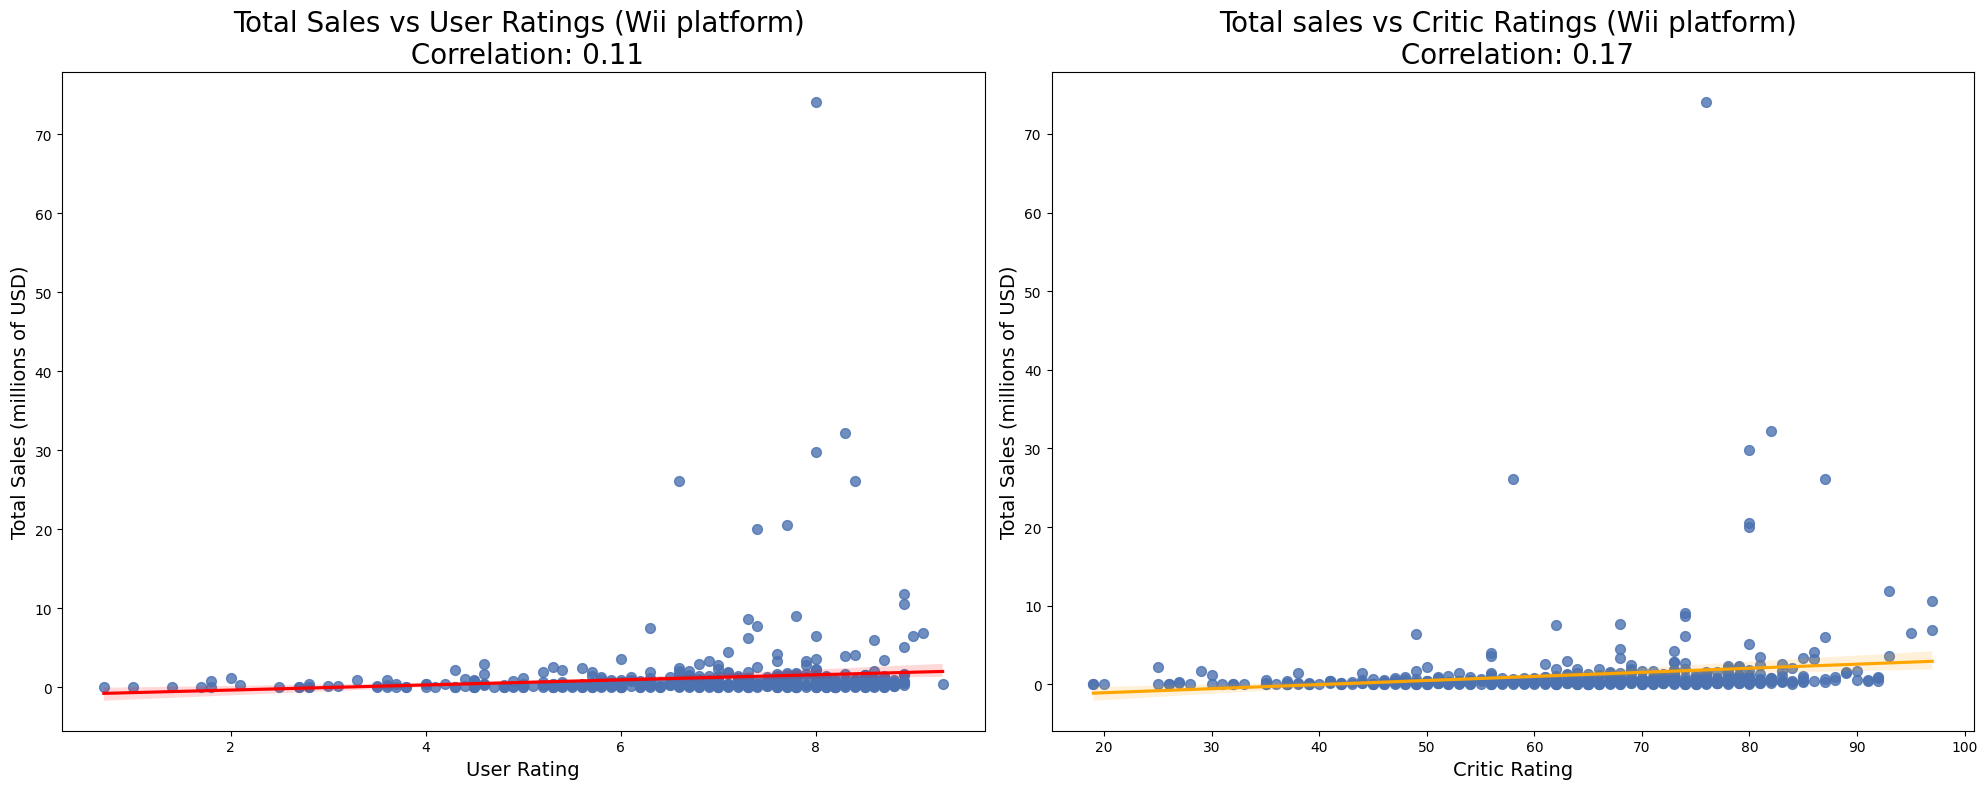

In [361]:
# Scatter plot with trend line
plt.figure(figsize=(20, 8))

# Plot 1: Sales vs User Ratings
plt.subplot(1, 2, 1)
sns.regplot(x='user_score', y='total_sales', data=df_wii, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title(f"Total Sales vs User Ratings (Wii platform) \n Correlation: {users_correlation:.2f}", fontsize=20)
plt.xlabel("User Rating", fontsize=14)
plt.ylabel("Total Sales (millions of USD)", fontsize=14)

# Plot 2: Sales vs Critic Ratings
plt.subplot(1, 2, 2)
sns.regplot(x='critic_score', y='total_sales', data=df_wii, scatter_kws={'s':50}, line_kws={'color':'orange'})
plt.title(f"Total sales vs Critic Ratings (Wii platform) \n Correlation: {critic_correlation:.2f}", fontsize=20)
plt.xlabel("Critic Rating", fontsize=14)
plt.ylabel("Total Sales (millions of USD)", fontsize=14)

plt.tight_layout()
plt.show()


**It was found that for the Wii platform, the correlation between total sales and the scores is positive. In other words, as the score increases, total sales tend to increase as well.**

In [362]:
# Selecting all information from PS2 platform
df_ps2 = df_sales_cleaned_scores[df_sales_cleaned_scores['platform'] == "PS2"]

# Dropping nan values
df_ps2= df_ps2.dropna()

#checking results
df_ps2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1161 entries, 17 to 16591
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1161 non-null   object 
 1   platform         1161 non-null   object 
 2   year_of_release  1161 non-null   int32  
 3   genre            1161 non-null   object 
 4   na_sales         1161 non-null   float64
 5   eu_sales         1161 non-null   float64
 6   jp_sales         1161 non-null   float64
 7   other_sales      1161 non-null   float64
 8   critic_score     1161 non-null   float64
 9   user_score       1161 non-null   float64
 10  rating           1161 non-null   object 
 11  total_sales      1161 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 113.4+ KB


In [363]:
# Calculando a correlação de Pearson para a plataforma PS2
users_correlation, _ = pearsonr(df_ps2['total_sales'], df_ps2['user_score'])
critic_correlation, _ = pearsonr(df_ps2['total_sales'], df_ps2['critic_score'])

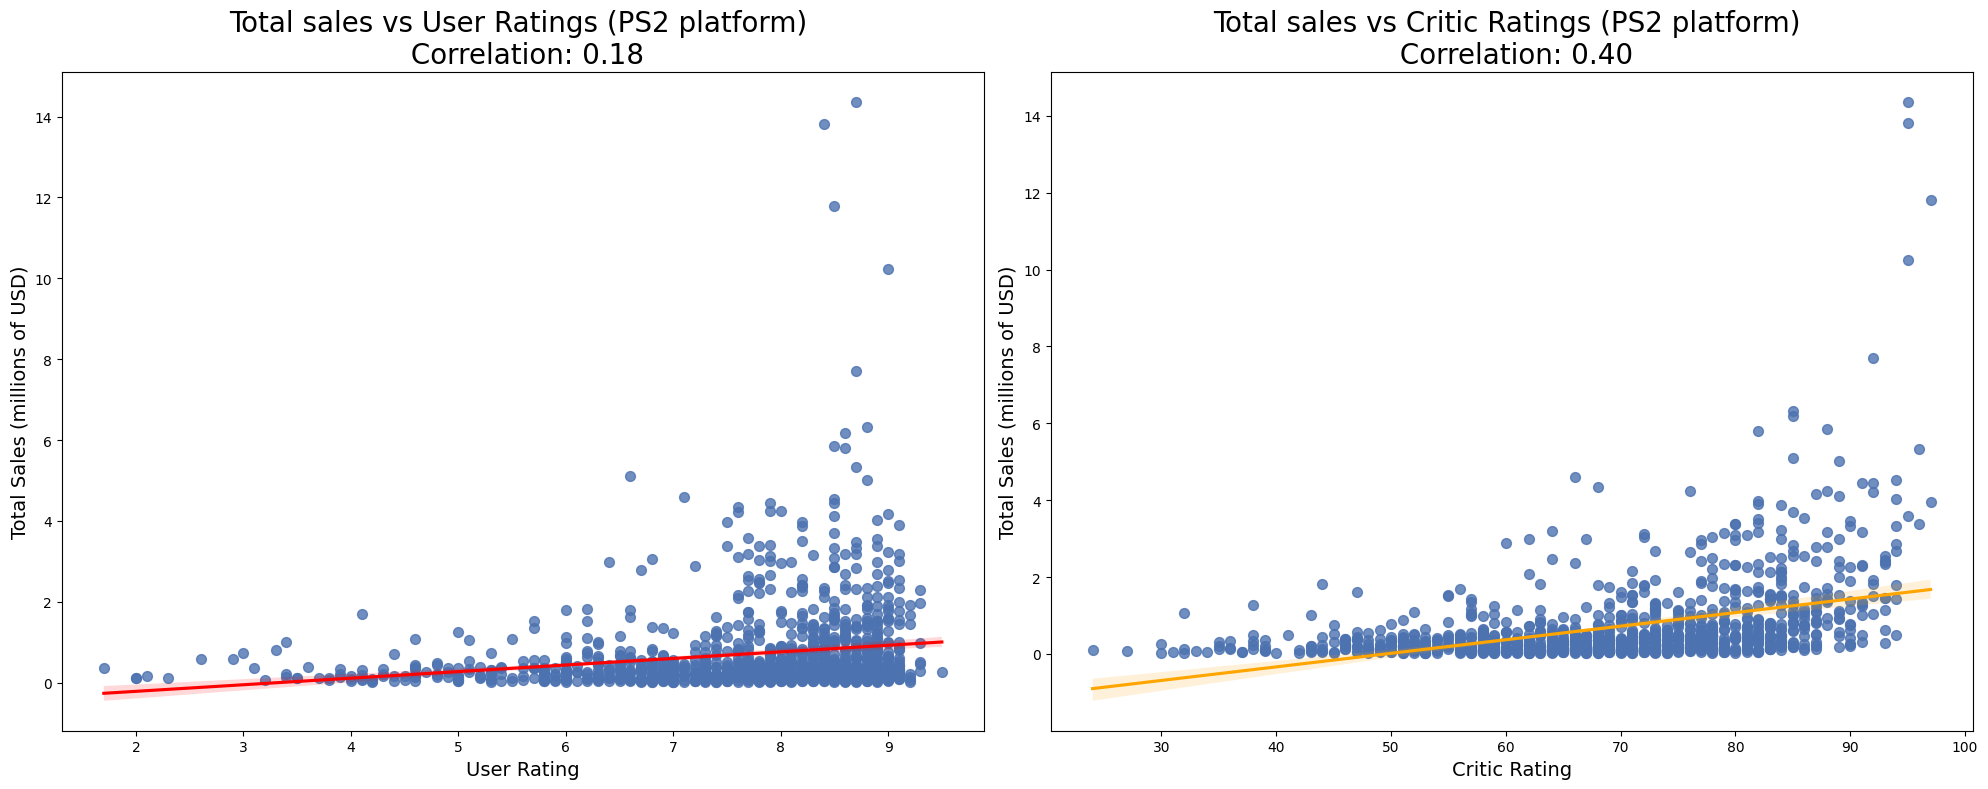

In [364]:
# Scatter plot with trend line
plt.figure(figsize=(20, 8))

# Plot 1: Sales vs User Ratings
plt.subplot(1, 2, 1)
sns.regplot(x='user_score', y='total_sales', data=df_ps2, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title(f"Total sales vs User Ratings (PS2 platform) \n Correlation: {users_correlation:.2f}", fontsize=20)
plt.xlabel("User Rating", fontsize=14)
plt.ylabel("Total Sales (millions of USD)", fontsize=14)

# Plot 2: Sales vs Critic Ratings
plt.subplot(1, 2, 2)
sns.regplot(x='critic_score', y='total_sales', data=df_ps2, scatter_kws={'s':50}, line_kws={'color':'orange'})
plt.title(f"Total sales vs Critic Ratings (PS2 platform) \n Correlation: {critic_correlation:.2f}", fontsize=20)
plt.xlabel("Critic Rating", fontsize=14)
plt.ylabel("Total Sales (millions of USD)", fontsize=14)

plt.tight_layout()
plt.show()


**Moreover, a similar positive correlation between total sales and scores was also found for the PS2 platform. However, this correlation is stronger for both categories of scores then it is for the Wii platform.**

In [365]:
# Selecting all information from PS2 platform
df_ps4 = df_sales_cleaned_scores[df_sales_cleaned_scores['platform'] == "PS4"]

# Dropping nan values
df_ps4= df_ps4.dropna()

#checking results
df_ps4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 42 to 16530
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             249 non-null    object 
 1   platform         249 non-null    object 
 2   year_of_release  249 non-null    int32  
 3   genre            249 non-null    object 
 4   na_sales         249 non-null    float64
 5   eu_sales         249 non-null    float64
 6   jp_sales         249 non-null    float64
 7   other_sales      249 non-null    float64
 8   critic_score     249 non-null    float64
 9   user_score       249 non-null    float64
 10  rating           249 non-null    object 
 11  total_sales      249 non-null    float64
dtypes: float64(7), int32(1), object(4)
memory usage: 24.3+ KB


In [366]:
# Calculando a correlação de Pearson para a plataforma PS4
users_correlation, _ = pearsonr(df_ps4['total_sales'], df_ps4['user_score'])
critic_correlation, _ = pearsonr(df_ps4['total_sales'], df_ps4['critic_score'])

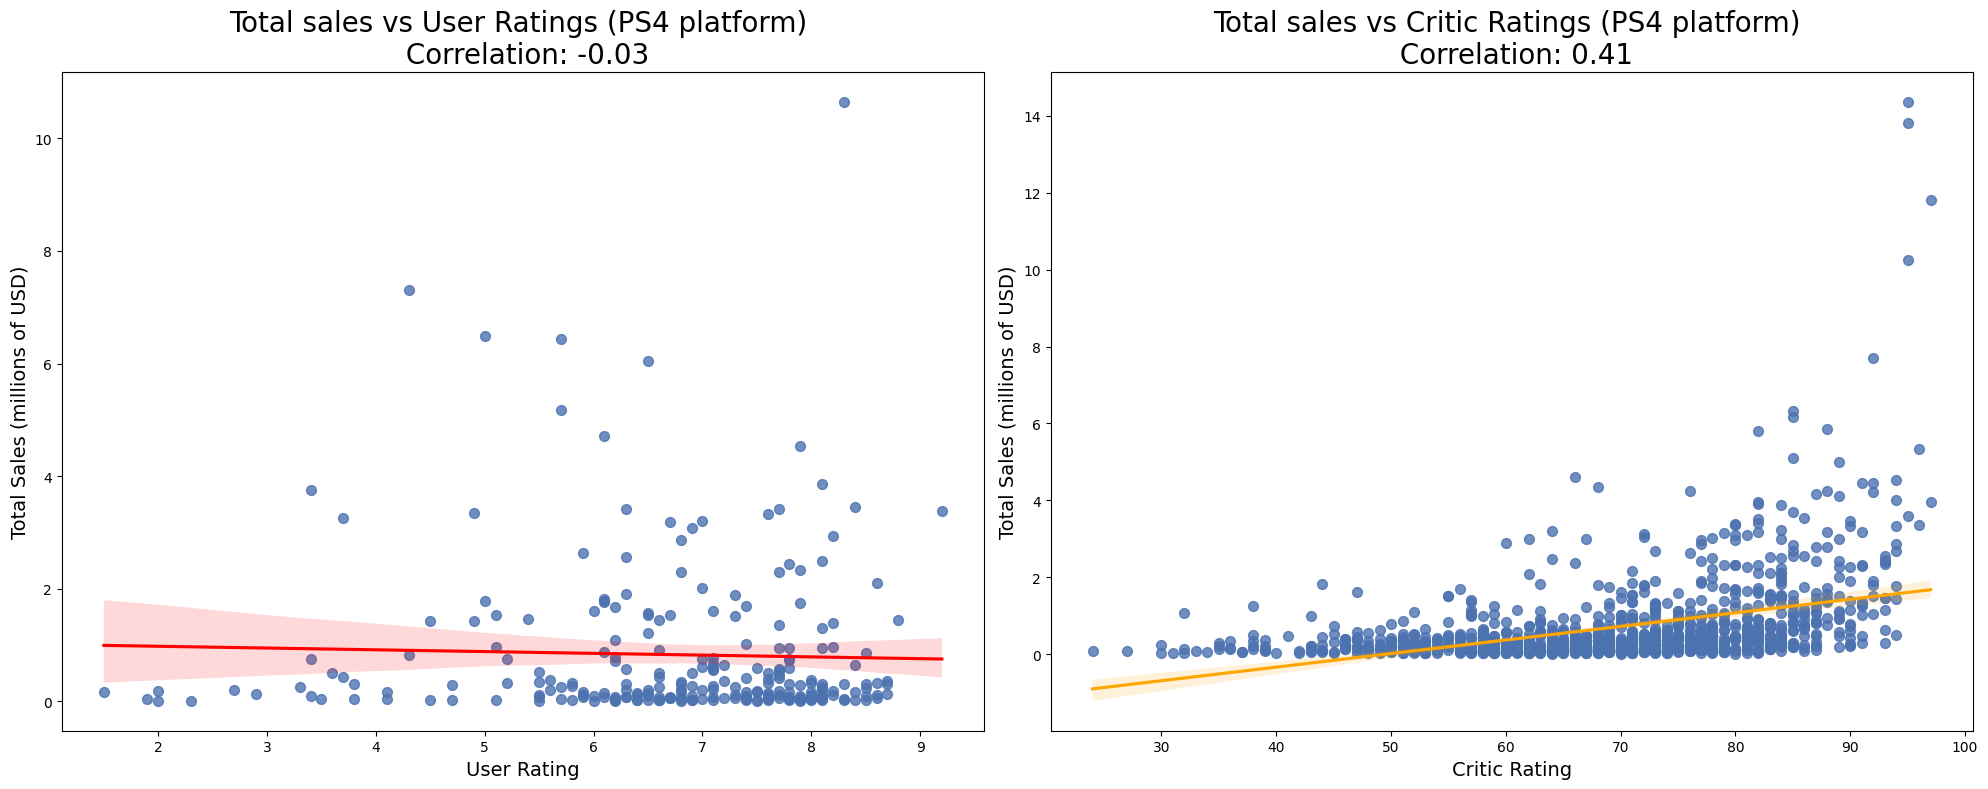

In [367]:
# Scatter plot with trend line
plt.figure(figsize=(20, 8))

# Plot 1: Sales vs User Ratings
plt.subplot(1, 2, 1)
sns.regplot(x='user_score', y='total_sales', data=df_ps4, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title(f"Total sales vs User Ratings (PS4 platform) \n Correlation: {users_correlation:.2f}", fontsize=20)
plt.xlabel("User Rating", fontsize=14)
plt.ylabel("Total Sales (millions of USD)", fontsize=14)

# Plot 2: Sales vs Critic Ratings
plt.subplot(1, 2, 2)
sns.regplot(x='critic_score', y='total_sales', data=df_ps2, scatter_kws={'s':50}, line_kws={'color':'orange'})
plt.title(f"Total sales vs Critic Ratings (PS4 platform) \n Correlation: {critic_correlation:.2f}", fontsize=20)
plt.xlabel("Critic Rating", fontsize=14)
plt.ylabel("Total Sales (millions of USD)", fontsize=14)

plt.tight_layout()
plt.show()

**The correlation between total sales and scores for the PS4 platform is slightly different from the others. The plot shows that user ratings tend to not have correlation with sales. However, the correlation between total sales and critic ratings is positive. In other words, the critic score has a greater influence on the platform's total sales than the score given by users.**

#### Distribution per genre

In [251]:
# Grouping data by gender
df_sales_genre = df_sales_from_2005.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

# Displaying results
df_sales_genre.head()

,genre,total_sales
0,Action,1079.26
10,Sports,756.69
8,Shooter,674.94
3,Misc,559.45
7,Role-Playing,508.27


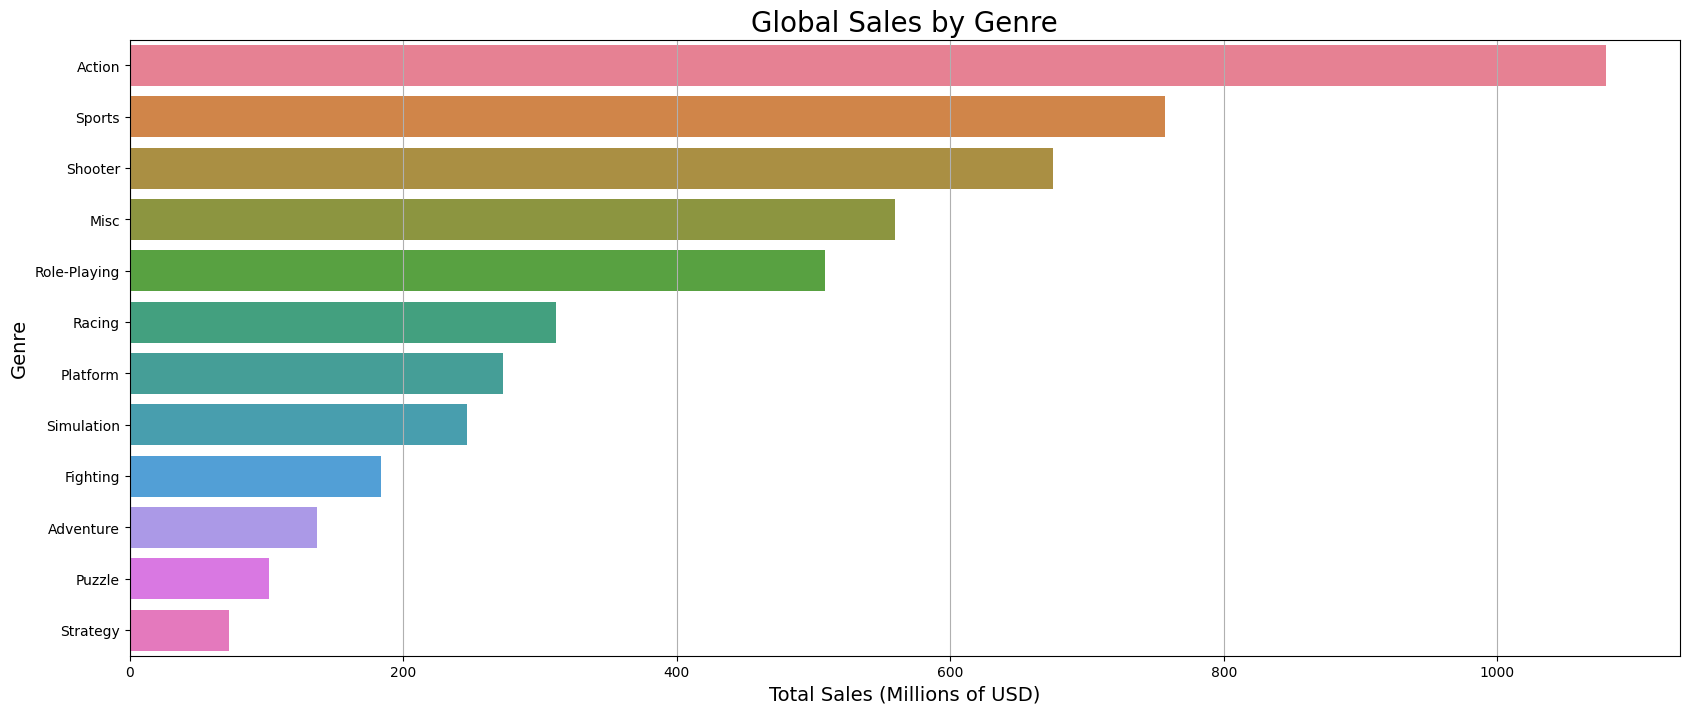

In [197]:
# Selecting pallete
palette = sns.color_palette("husl", df_sales_genre['genre'].nunique())

# Plotting visualization
plt.figure(figsize=(20, 8))
sns.barplot(data=df_sales_genre, x='total_sales', y='genre', palette=palette)

plt.title('Global Sales by Genre', fontsize=20)
plt.xlabel('Total Sales (Millions of USD)', fontsize=14)
plt.ylabel('Genre', fontsize=14)

plt.grid(axis='x')
plt.show()

**It is clear that platforms which invest the most in action, sports, and shooter genres have the highest total sales compared to others.**